In [1]:
%config InlineBackend.figure_format = 'retina'

# Individual predictor training

This Jupyter notebook is used to train the individual predictors to benchmark the system performance. In total, 15 individual predictors will be trained on stock and index data. For the benchmarking process, predictors from the predictorsI.py and predictorsII.py are trained. Each predictor will be served with an input batch that is used to dertmine the forecast estimation. The input size will be set at 20 data points (20 trading days). Furthermore, 3 forecasting horizions are considered: 5, 30 and 60 datapoints into the future.

In [2]:
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsIII.py

## Dataset

The first dataset used is the stock price of Ford Motor Company (F). Prices are in USD and listed on NYSE - Nasdaq. The data is extracted via the Yahoo Finance API accessed via the pandas data reader function. 

In [3]:
data = DataLoader('F', '2010-01-01', '2018-01-01')
prices = data.get_adjclose()

In [4]:
print(data)

Total count of rows: 2013
Ticker: F
Start: 2010-01-01
End: 2018-01-01


In [5]:
data.statistics()

,High,Low,Open,Close,Volume,Adj Close
count,2013.000000,2013.000000,2013.000000,2013.000000,2.013000e+03,2013.000000
mean,13.614367,13.325782,13.482623,13.471868,4.781743e+07,9.834059
std,2.189850,2.183796,2.189163,2.185088,3.550829e+07,1.612406
min,9.030000,8.820000,8.990000,8.920000,7.128800e+06,6.123986
25%,11.910000,11.600000,11.790000,11.760000,2.745320e+07,8.703906
50%,13.280000,13.000000,13.140000,13.150000,3.782080e+07,10.073213
75%,15.450000,15.170000,15.300000,15.280000,5.442480e+07,11.056963
max,18.969999,18.610001,18.809999,18.790001,4.808795e+08,12.847414


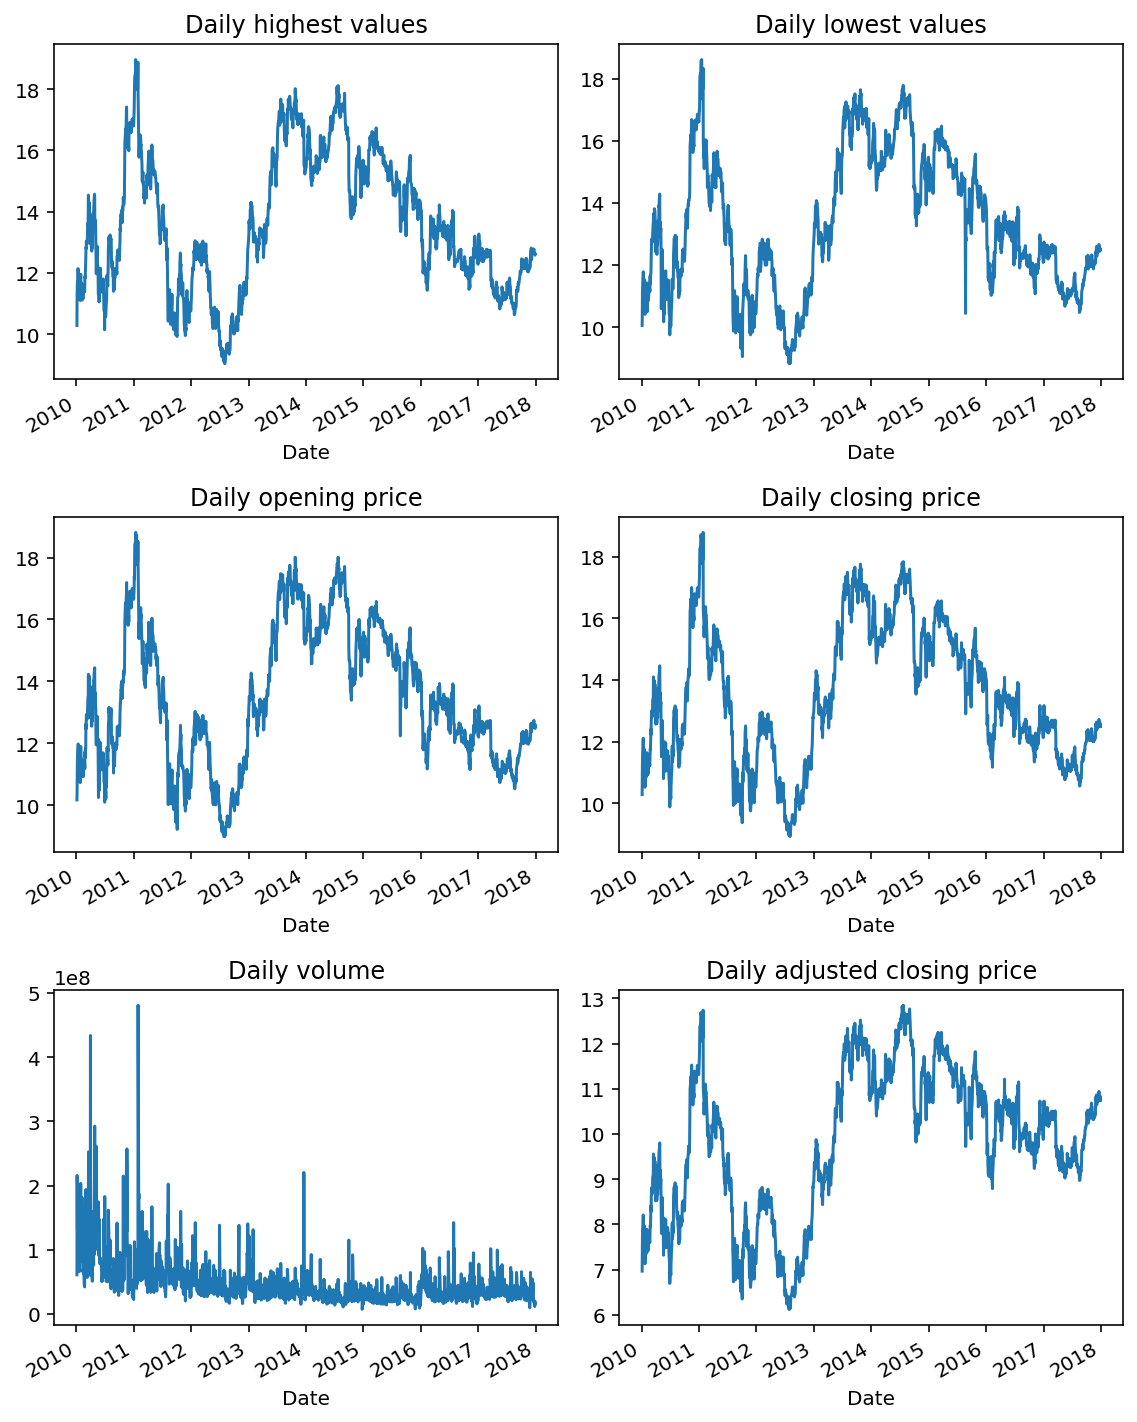

In [6]:
data.plotting_grid()

In [7]:
predictor1 = BasicUnivariatePredictor(20, 5, prices)
predictor1.create_lstm()
predictor1.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 40)            6720      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 50)            18200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 5)                 255       
Total params: 45,375
Trainable params: 45,375
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predictor1.fit_model(80, 0)

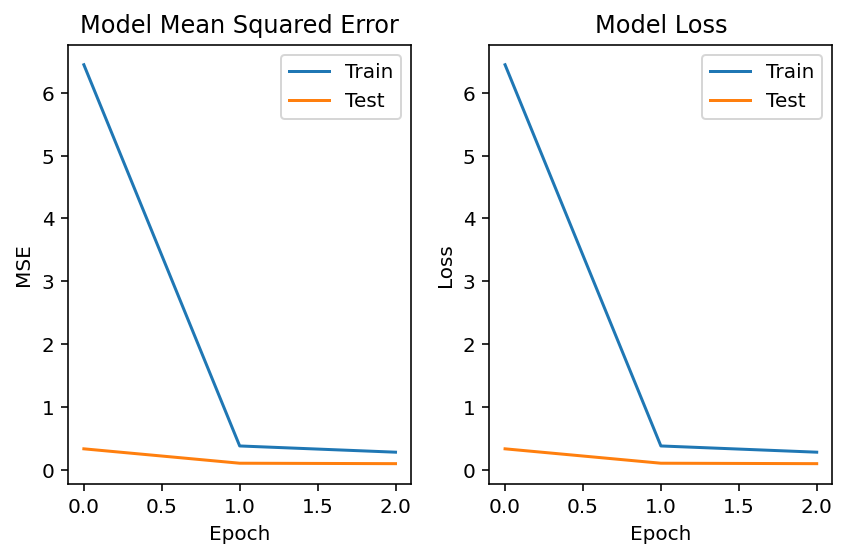

In [9]:
predictor1.show_performance()

In [ ]:
predictor1.save_model()